In [1]:
import pandas as pd
from PIL import Image
import os
import cv2
df=pd.read_csv('Relevent_Cards.csv', index_col=0)

In [2]:
cards_with_images=df[df['multiverseid'].notnull()]

In [3]:
subset=cards_with_images.sample(1000)
train_set=subset[0:600]
test_set=subset[601:1001]

In [4]:
def load_and_crop_image(multiverse_id):
    im=cv2.imread('Cards/'+str(multiverse_id)+'.jpg')
    w, h, channels = im.shape
    return im[30:165, 25:195]
X_train=[]
X_test=[]
for i in train_set.multiverseid:
    X_train=X_train+[load_and_crop_image(int(i))]
for i in test_set.multiverseid:
    X_test=X_test+[load_and_crop_image(int(i))]
import numpy as np
from PIL import Image
X_train=np.array(X_train)
X_test=np.array(X_test)

In [5]:
y_train=[]
for i in train_set['colorIdentity'].fillna('[]').values:
    cid=[0,0,0,0,0]
    if 'W' in i:
        cid[0]+=1
    if 'U' in i:
        cid[1]+=1
    if 'B' in i:
        cid[2]+=1
    if 'R' in i:
        cid[3]+=1
    if 'G' in i:
        cid[4]+=1
    y_train=y_train+[cid]
y_test=[]
for i in test_set['colorIdentity'].fillna('[]').values:
    cid=[0,0,0,0,0]
    if 'W' in i:
        cid[0]+=1
    if 'U' in i:
        cid[1]+=1
    if 'B' in i:
        cid[2]+=1
    if 'R' in i:
        cid[3]+=1
    if 'G' in i:
        cid[4]+=1
    y_test=y_test+[cid]
y_train=np.array(y_train)
y_test=np.array(y_test)

In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


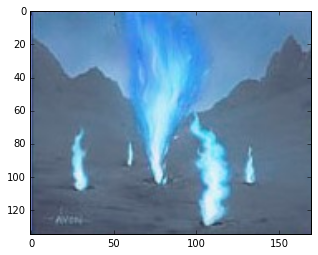

In [7]:
plt.imshow(X_test[0])

In [8]:
X_train = X_train.reshape(X_train.shape[0], 135, 170, 3)
X_test = X_test.reshape(X_test.shape[0], 135, 170, 3)

In [9]:
print X_train.shape

(600, 135, 170, 3)


In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(135,170, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.10))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(5, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [19]:
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10


ResourceExhaustedError: OOM when allocating tensor with shape[172640,128]
	 [[Node: dense_3/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=9554607, _device="/job:localhost/replica:0/task:0/gpu:0"](dense_3/random_uniform/shape)]]

Caused by op u'dense_3/random_uniform/RandomUniform', defined at:
  File "<string>", line 1, in <module>
  File "/usr/lib/python2.7/dist-packages/IPython/kernel/zmq/kernelapp.py", line 469, in main
    app.start()
  File "/usr/lib/python2.7/dist-packages/IPython/kernel/zmq/kernelapp.py", line 459, in start
    ioloop.IOLoop.instance().start()
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/usr/lib/python2.7/dist-packages/tornado/ioloop.py", line 866, in start
    handler_func(fd_obj, events)
  File "/usr/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python2.7/dist-packages/IPython/kernel/zmq/ipkernel.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/lib/python2.7/dist-packages/IPython/kernel/zmq/ipkernel.py", line 245, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/lib/python2.7/dist-packages/IPython/kernel/zmq/ipkernel.py", line 389, in execute_request
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2741, in run_cell
    interactivity=interactivity, compiler=compiler)
  File "/usr/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2827, in run_ast_nodes
    if self.run_code(code):
  File "/usr/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2883, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-4fb98b0fcce9>", line 7, in <module>
    model.add(Dense(128, activation='relu'))
  File "/home/simon/.local/lib/python2.7/site-packages/keras/models.py", line 469, in add
    output_tensor = layer(self.outputs[0])
  File "/home/simon/.local/lib/python2.7/site-packages/keras/engine/topology.py", line 569, in __call__
    self.build(input_shapes[0])
  File "/home/simon/.local/lib/python2.7/site-packages/keras/layers/core.py", line 825, in build
    constraint=self.kernel_constraint)
  File "/home/simon/.local/lib/python2.7/site-packages/keras/legacy/interfaces.py", line 87, in wrapper
    return func(*args, **kwargs)
  File "/home/simon/.local/lib/python2.7/site-packages/keras/engine/topology.py", line 391, in add_weight
    weight = K.variable(initializer(shape), dtype=dtype, name=name)
  File "/home/simon/.local/lib/python2.7/site-packages/keras/initializers.py", line 208, in __call__
    dtype=dtype, seed=self.seed)
  File "/home/simon/.local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 3536, in random_uniform
    dtype=dtype, seed=seed)
  File "/home/simon/.local/lib/python2.7/site-packages/tensorflow/python/ops/random_ops.py", line 236, in random_uniform
    shape, dtype, seed=seed1, seed2=seed2)
  File "/home/simon/.local/lib/python2.7/site-packages/tensorflow/python/ops/gen_random_ops.py", line 249, in _random_uniform
    seed=seed, seed2=seed2, name=name)
  File "/home/simon/.local/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/simon/.local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/simon/.local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[172640,128]
	 [[Node: dense_3/random_uniform/RandomUniform = RandomUniform[T=DT_INT32, dtype=DT_FLOAT, seed=87654321, seed2=9554607, _device="/job:localhost/replica:0/task:0/gpu:0"](dense_3/random_uniform/shape)]]


In [39]:
score = model.evaluate(X_test, y_test, verbose=0)

In [40]:
print score

[1.5109035397923329, 0.71942985730041231]


In [41]:
model.predict(X_test)

array([[  9.76228356e-01,   4.15713259e-07,   8.74078646e-03,
          4.07904293e-03,   1.09513905e-02],
       [  1.41636241e-08,   5.57046292e-07,   9.99999166e-01,
          1.49711653e-07,   1.27038774e-07],
       [  4.15907592e-01,   6.91253915e-02,   2.09612861e-01,
          8.93387944e-02,   2.16015384e-01],
       ..., 
       [  1.74414497e-02,   4.08539064e-02,   2.76403385e-03,
          9.32560444e-01,   6.38014823e-03],
       [  2.29471753e-09,   2.93613328e-11,   1.65074300e-06,
          3.13807764e-11,   9.99998331e-01],
       [  6.29799479e-06,   9.99982357e-01,   8.57568466e-06,
          2.65986819e-06,   9.75265451e-08]], dtype=float32)

In [43]:
test_set.tail(5)

,multiverseid,name,artist,colors,colorIdentity,layout,cmc,rarity,type,subtypes,supertypes,power,toughness,set
6862,405453.0,Wistful Selkie,Mark Tedin,"[Blue, Green]","[U, G]",normal,3.0,Uncommon,Creature — Merfolk Wizard,"[Merfolk, Wizard]",NaN,2,2,C15
8105,416796.0,Archdemon of Paliano,Evan Shipard,[Black],[B],normal,4.0,Rare,Creature — Demon,[Demon],NaN,5,4,CN2
22908,24640.0,Inflame,Eric Peterson,[Red],[R],normal,1.0,Common,Instant,NaN,NaN,NaN,NaN,PCY
12761,366269.0,Serene Remembrance,David Palumbo,[Green],[G],normal,1.0,Uncommon,Sorcery,NaN,NaN,NaN,NaN,GTC
7668,2810.0,Juxtapose,Justin Hampton,[Blue],[U],normal,4.0,Rare,Sorcery,NaN,NaN,NaN,NaN,CHR
